# <center> Research analysis of New York City rental market data

![Text](https://images.unsplash.com/photo-1470219556762-1771e7f9427d?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=2978&q=80)
Photo by [Oliver Niblett](https://unsplash.com/@ojnibl?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText) on [Unsplash](https://unsplash.com/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText)

Since 2008, guests and hosts have been using Airbnb to expand travel opportunities and present a more unique and personalized way to experience the world. The data set under study describes New York listing activity and metrics for 2019.

This publicly available dataset is part of Airbnb, and its source can be found on the [website](http://insideairbnb.com)

### Loading libraries and getting to know the data

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

Let's load the data and look at the first few lines

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')

# consider the first 5 observations in the dataset
data.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

Let's see what characteristics of each observation are available to us

In [3]:
# columns that represent the dataset
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

So, we have the following data available for each object:

__'id'__ - object ID  
__'name'__ - the name of the object  
__'name'__ - the name of the object  
__'host_id'__ is the ID of the owner  
__'host_name'__ is the name of the owner  
__'neighborhood_group'__ - borough of New York  
__'neighbourhood'__ is the area  
__'latitude'__ - latitude  
__'longitude'__ - longitude  
__'room_type'__ - housing type  
__'price'__ - the price of accommodation  
__'minimum_nights'__ - the minimum number of nights  
__'number_of_reviews'__ - number of reviews  
__'last_review'__ - date of the last review  
__'reviews_per_month'__ - number of reviews per month  
__'calculated_host_listings_count'__ - number of hotels for this owner  
__'availability_365'__ is the workload of a year

Let's look at the size of the data table

In [4]:
# dataset size
data.shape

(48895, 16)

We have 48'895 observations and 16 columns available

Let's see what types of data represent the characteristics of observations

In [5]:
# data types that represent attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Let's see if there are missing values in the data and how many of them there are

In [6]:
# number of missing values in the data
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

As you can see from the table, some characteristics have missing values, namely: __'name'__ - 16, __'host_name'__ - 21, __'last_review '__ - 10052,  
__'reviews_per_month'__ - 10052.  

If with the first two characteristics it is clear that this is due to missing data, then with the characteristics associated with the number of reviews, I can assume that these hotels do not have any reviews.  

Let's look at the main statistical parameters of the numeric characteristics of the dataset

In [7]:
# let's look at the main statistical parameters of the dataset characteristics with the exception 
# of those that don't make sense
data.drop(['host_id', 'id', 'latitude', 'longitude'], axis=1).describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  48895.000000    48895.000000       48895.000000       38843.000000   
mean     152.720687        7.029962          23.274466           1.373221   
std      240.154170       20.510550          44.550582           1.680442   
min        0.000000        1.000000           0.000000           0.010000   
25%       69.000000        1.000000           1.000000           0.190000   
50%      106.000000        3.000000           5.000000           0.720000   
75%      175.000000        5.000000          24.000000           2.020000   
max    10000.000000     1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

You should pay attention to the fact that the minimum value of the placement price is zero, which is most likely an error. I doubt that anyone in New York provides housing for free.

So, we are done with the introduction to the data and now we will move on to its analysis. Let's see how the data is distributed by the __'neighborhood_group'__ attribute.

### Data analysis and plotting

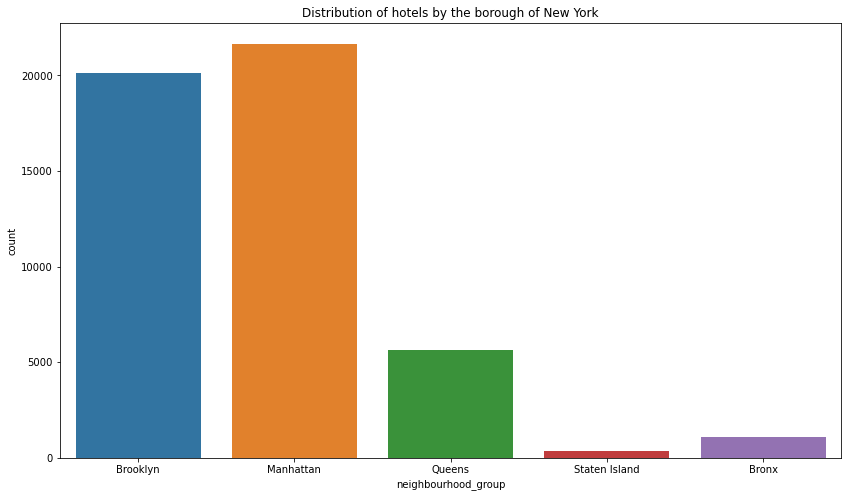

In [8]:
# Plotting the distribution of data based on the 'neighborhood_group' attribute
plt.figure(figsize=(14,8))
sns.countplot(data['neighbourhood_group']);
plt.title('Distribution of hotels by the borough of New York')
plt.show()

The graph shows that the most popular boroughs in the housing market are Brooklyn and Manhattan. Queens, Staten Island, and the Bronx account for less than 30% of the market.

Let's create a table of the dependence of the placement price on the borough of New York. Is there any correlation?

In [9]:
# let's see how the price changes depending on the borough
n_group = data.groupby('neighbourhood_group').describe()
n_group.xs('price',axis = 1)

count        mean         std   min   25%    50%  \
neighbourhood_group                                                       
Bronx                 1091.0   87.496792  106.709349   0.0  45.0   65.0   
Brooklyn             20104.0  124.383207  186.873538   0.0  60.0   90.0   
Manhattan            21661.0  196.875814  291.383183   0.0  95.0  150.0   
Queens                5666.0   99.517649  167.102155  10.0  50.0   75.0   
Staten Island          373.0  114.812332  277.620403  13.0  50.0   75.0   

                       75%      max  
neighbourhood_group                  
Bronx                 99.0   2500.0  
Brooklyn             150.0  10000.0  
Manhattan            220.0  10000.0  
Queens               110.0  10000.0  
Staten Island        110.0   5000.0

The table shows that the price varies from \\$ 0 to \\$ 10'000. Staten Island and the Bronx have maximum prices of \\$ 5'000 and \\$ 2'500, respectively.

Despite the wide range of prices, it should be noted that the average placement price does not exceed \\$ 200.

In Manhattan, you can stay up to \\$ 200, in Brooklyn and Staten Island for \\$ 115-125, and in the Bronx and Queens, you can rent housing up to \\$ 100 per night.

Let's see how prices are distributed relative to the borough on the chart.

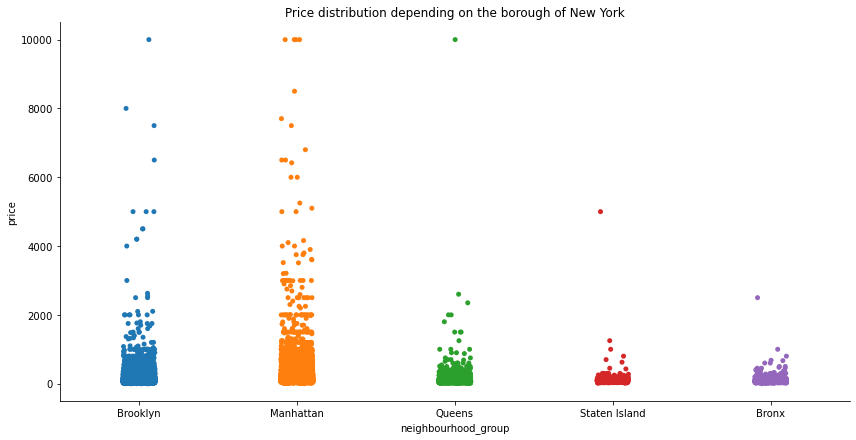

In [10]:
# price chart relative to the borough of New York
sns.catplot(x = 'neighbourhood_group', y = 'price', data=data, size=6, aspect=2)
plt.title('Price distribution depending on the borough of New York')
plt.show()

This chart clearly shows that the main part of the prices is located below $ 1000. Let's draw another graph to finally understand the distribution of prices.

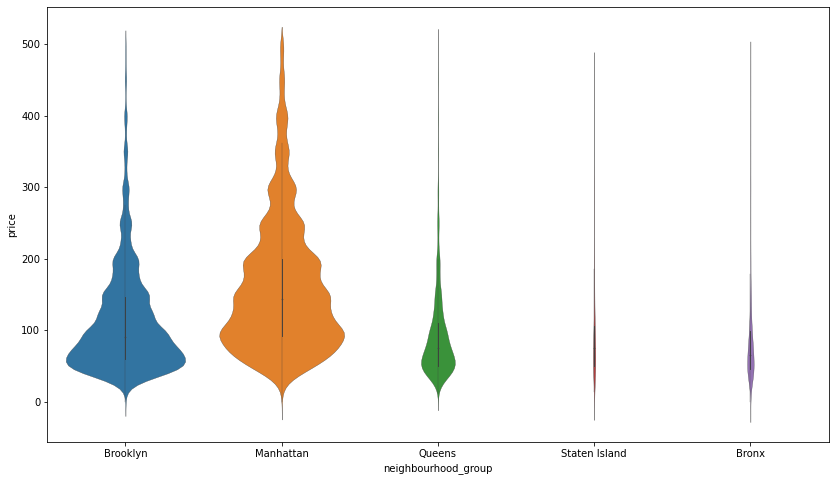

In [11]:
# let's look at the price distribution with the upper limit of $ 500
data_price_500 = data[data['price'] < 500]
plt.figure(figsize = (14,8))
sns.violinplot(x = 'neighbourhood_group', y = 'price', data = data_price_500, scale = 'count', linewidth = 0.3);

This graph shows the density and distribution of prices in different boroughs.

The width of the figures depends on the number of observations in each borough. Both Brooklyn and Manhattan have a lot of offers for the price of 100, but Manhattan has more offers at a higher price.

Now let's look at the distribution of offers depending on the type of housing

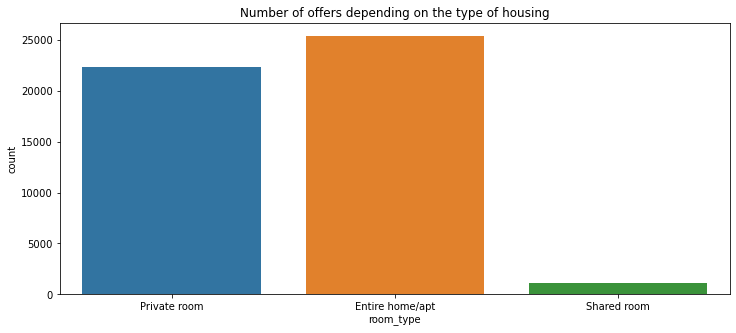

In [12]:
# let's look at the distribution of offers depending on the type of housing
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(data['room_type'])
plt.title('Number of offers depending on the type of housing')
plt.show()

The graph shows that individual apartments and isolated rooms are the most popular. Shared rooms are almost not in demand.

Let's look at the distribution of prices for different types of housing. Let's look at observations with the placement price no higher than $ 500.

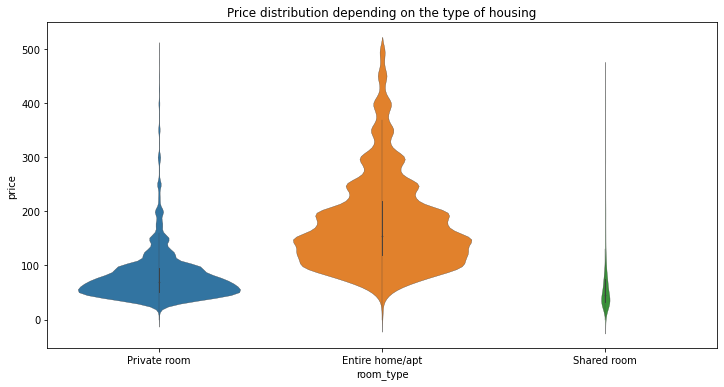

In [13]:
# price distribution chart for different types of offers (data for prices below 500)
plt.figure(figsize = (12,6))
sns.violinplot(x = 'room_type', y = 'price', data = data_price_500, scale = 'count', linewidth = 0.3);
plt.title('Price distribution depending on the type of housing')
plt.show()

It is logical that individual apartments on average cost more than isolated rooms. It is also worth noting that the range of prices for individual apartments is wider and every traveler will find an offer for their pocket. Well, those who want to save money will choose an isolated room up to $ 100.

Now let's see how things are with the offer of all types of housing in each of the 5 boroughs.

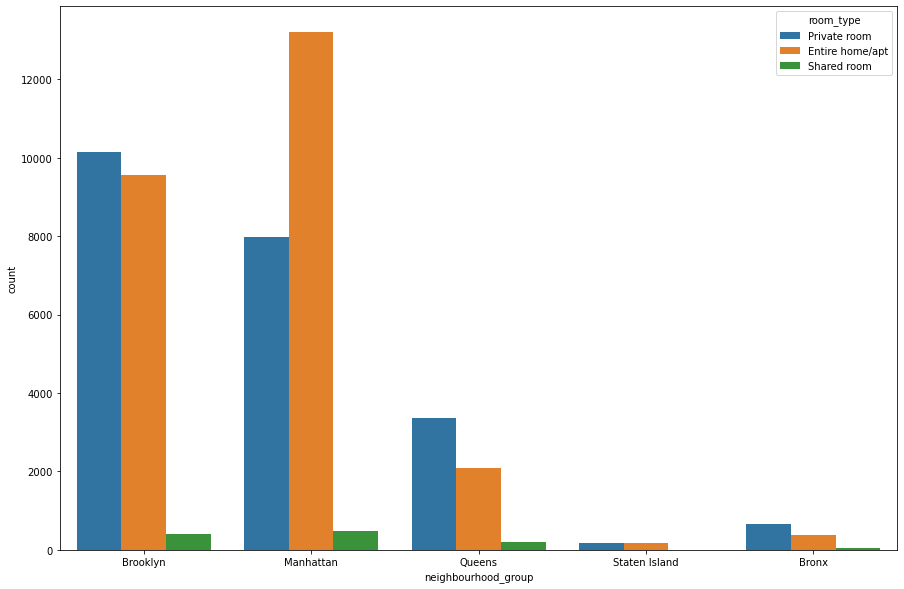

In [14]:
# the number of different types of housing depending on the borough of New York
plt.figure(figsize=(15,10))
sns.countplot(data['neighbourhood_group'], hue=data['room_type']);

In Brooklyn, Queens, and the Bronx, isolated rooms are more popular than apartments. In Manhattan, the situation is reversed - apartments are more popular than rooms. And only in Staten Island, the demand is about the same, but there is too little data to give a fair estimate.

#### Visualization of geographical coordinates from a dataset

Given that our data contains information about the longitude and latitude of each object, let's plot them on the map of New York to see how they correspond to reality.

In [15]:
# plotting all objects on the map
groups = {'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2, 'Staten Island': 3, 'Bronx': 4}
col = data['neighbourhood_group'].apply(lambda x: groups[x])

fig = go.Figure()
fig.update_layout(mapbox_style="open-street-map")
fig = go.Figure(go.Scattermapbox(lat=data['latitude'], lon=data['longitude'], marker=dict(color=col)))
map_center = go.layout.mapbox.Center(lat=data['latitude'].mean(), lon=data['longitude'].mean())
fig.update_layout(mapbox_style="open-street-map", mapbox=dict(center=map_center, zoom=8.5))
fig.show()

Indeed, it is very similar to the truth.

### Machine learning as an assistant in choosing a hotel name

The new York city rental market is rife with offers, and competition is quite high. I think that for a homeowner to set an adequate price for their apartments is quite a serious task. You need to research the offers of competitors in the city, evaluate them by a dozen parameters, and set a competitive price. Pretty time-consuming, isn't it?

What if you don't burden yourself with all these parameters, but decide on the price only based on the name of the hotel? Looks like it's time for some serious machine learning! Let's predict the placement price depending on the name. After all, everyone knows that what you call a ship - so it will sail!

Import additional libraries

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

Load the data and select the 'name' and 'price'attributes

Let's look at the data

In [17]:
df = pd.read_csv('AB_NYC_2019.csv')
data = df[['name','price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    48879 non-null  object
 1   price   48895 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 764.1+ KB


Let's look at the price characteristics

In [18]:
data.describe().T

count        mean        std  min   25%    50%    75%      max
price  48895.0  152.720687  240.15417  0.0  69.0  106.0  175.0  10000.0

Remove from the data observations that do not have names, and the placement price is zero.

In [19]:
# delete observations that don't have names
data.drop(data[data['name'].notna() != True].index, inplace=True)

# delete observations where the placement price is 0
data.drop(data[data['price'] == 0].index, inplace=True)

Separating the target attribute from the independent one

In [20]:
X, y = data['name'], data['price']

Let's create a pipeline. It consistently applies CountVectorizer, TfidfTransformer, and linear regression to observations.

In [21]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression()),
])

Let's look at the average value of the absolute error in cross-validation.

In [22]:
cvs = cross_val_score(pipeline, X, y, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')
print(cvs.mean())

-73.0583576865399


We got an average of 73. a Good result, considering that prices range from 10 to 10'000 dollars.

Let's split the sample into a train and test. Let's look at the names of the 5 places with the lowest placement price.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
cheap = X_test.loc[y_test.sort_values().head(5).index]
for i in cheap:
    print(i)

Voted #1 Airbnb In NYC
Very Spacious bedroom, steps from CENTRAL PARK.
Quiet, Cozy UES Studio Near the Subway
Jen Apt
Large furnished 2 bedrooms- - 30 days Minimum


Now we will output 5 names with the highest placement price.

In [24]:
expensive = X_test.loc[y_test.sort_values().tail(5).index]
for i in expensive:
    print(i)

Gem of east Flatbush
70' Luxury MotorYacht on the Hudson
Film Location
2br - The Heart of NYC: Manhattans Lower East Side
Luxury 1 bedroom apt. -stunning Manhattan views


Let's train the model and look at the quality of the test sample.

In [25]:
pipeline.fit(X_train, y_train)
mean_absolute_error(y_test, pipeline.predict(X_test))

72.85035127208239

As a result, we get the same 73 dollars.

Let's combine hotel names, real values, and predicted price values into one data frame.

In [26]:
result = pd.concat([X_test, y_test], axis=1)
result['predict'] = pipeline.predict(X_test)
result.head()

name  price  predict
29348                          Lovely, river view oasis!     78      125
3209                              Urban Oasis in Chelsea    225      150
3090                          2 bdr NYC duplex w balcony    400       95
44399       Contemporary 1BR in Hell's Kitchen by Sonder    185      200
31952  Massive, sunny Williamsburg apartment w/ backyard    129      150

In a separate column 'module error' we will enter the difference between the predicted and real values modulo. Let's look at 5 values in which the model accurately predicted the price.

In [27]:
result['modulo error'] = abs(result['price'] - result['predict'])
result.sort_values(by=['modulo error']).head(5)

name  price  predict  \
40602                  Small Private Room with backyard     50       50   
11103  SMALL AND COZY PARISIAN STYLE APT IN EAST HARLEM     75       75   
44166                             211 east34 st  Room 6     40       40   
31934   South Park Slope House (Aug 5 - 27; 10 day min)    150      150   
48769  Williamsburg: private bright bedroom - cosy appt     70       70   

       modulo error  
40602             0  
11103             0  
44166             0  
31934             0  
48769             0

5 values in which the price is predicted poorly

In [28]:
result.sort_values(by=['modulo error']).tail(5)

name  price  predict  \
42523                70' Luxury MotorYacht on the Hudson   7500      200   
45666                               Gem of east Flatbush   7500      150   
4377                                       Film Location   8000       75   
17692    Luxury 1 bedroom apt. -stunning Manhattan views  10000      200   
40433  2br - The Heart of NYC: Manhattans Lower East ...   9999      150   

       modulo error  
42523          7300  
45666          7350  
4377           7925  
17692          9800  
40433          9849

Let's make a generator that will generate hotel names from random words. Let's see which of the names suggested by the generator will get the highest price.

In [29]:
# randomly generate 4 hotel names with the length of the name from 1 to 4
import random
words = ['beautiful', 'astonishing', 'grandiose', 'unusual', 'chic', 'royal', 'private', 'luxury']
types = ['apartments', 'hotel', 'room', 'studio', 'terrace']

i = 4
names = []

while i != 0:
    num = random.randint(1, 3)
    temp = ''
    while num != 0:
        temp = temp + ' ' + random.choice(words)
        num -= 1
    names.append(str(temp + ' ' + random.choice(types)).lstrip())
    i -= 1

# let's make a table with model predictions
board = pd.concat([pd.DataFrame(names, columns=['name']), pd.DataFrame(pipeline.predict(names), \
                                                               columns=['price'])], axis=1)
# output prices in descending order
board.sort_values(by='price', ascending=False)

name  price
1           luxury grandiose terrace    250
0   grandiose royal grandiose studio    120
2  grandiose luxury astonishing room     65
3                luxury unusual room     65

In our example, the model generated a list of possible hotel names for us. We can only choose from them based on our taste and common sense.

## Summary

So, we did a little research on the data and can draw several conclusions:
1. There are some deviations in the price column, namely prices equal to "0", which in principle cannot correspond to reality.
2. Of the 5 groups of districts presented, Manhattan and Brooklyn are the most popular.
3. The price range ranges from 0 to 10,000, but the average price rises no higher than $ 200.
4. In both Brooklyn and Manhattan, there are many offers for the price of 100, but in Manhattan, there are more offers at a higher price.
5. The most popular are separate rooms and separate apartments. There is very little choice for shared rooms.
6. Apartments are more expensive than separate rooms.
7. Almost all areas have more demand for the room. In Manhattan, the situation is reversed: apartments are more popular.
8. Using machine learning, we selected some of the most likely commercially successful hotel names.